In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
company = pd.read_csv('/content/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.shape

(400, 11)

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


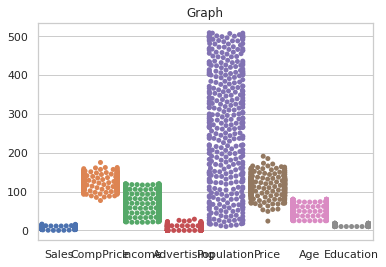

In [5]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(data=company)
plt.title('Graph')
plt.show()

In [6]:
company['ShelveLoc'].unique

<bound method Series.unique of 0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object>

In [7]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [8]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [9]:
y

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

In [11]:
label_encoder= preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])

In [12]:
company['ShelveLoc'].unique()

array([0, 1, 2])

In [13]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [15]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [22]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean()*100)

65.0


Ensemble technique : Bagging

In [23]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
seed = 10
cart = DecisionTreeClassifier()
num_trees = 100

In [26]:
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, x,y, cv=kfold)
print(results1.mean()*100)

63.74999999999999
